# Similarity renormalization group (SRG)

__A. J. Tropiano [tropiano.4@osu.edu]__<br/>
__March 25, 2022__

This notebook illustrates SRG evolution by plotting contours of evolving potentials.

_Last update: May 17, 2022_

__To-do list:__
1. Say what each cell calculates and shows using markdown.
2. Add references.
3. Add option for other sub-blocks of coupled-channel potentials.

In [1]:
# Python imports
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Imports from A.T. codes
from scripts.figures import (
    set_rc_parameters, interpolate_matrix, label_channel, label_generator,
    label_kvnn, label_lambda, label_ticks
)
from scripts.potentials import Potential
from scripts.tools import convert_number_to_string, replace_periods

In [3]:
# Run this cell to turn on customized matplotlib graphics
set_rc_parameters()

# Plotting functions

In [4]:
# To-do: Add option to plot w.r.t. k^2 and k'^2 CHECK THIS
# To-do: Add doc-string
def potential_contour(
        kvnn, channel, kmax, kmid, ntot, generator=None, lamb=None,
        colorbar_limits=(-1.0,1.0), axes_limits=(0.0,4.0), k_squared=False,
        channel_label=False, generator_label=False, kvnn_label=False,
        lambda_label=False, save=False):
    """
    DOCSTRING
    """
    
    # --- Figure set-up --- #
    plt.close('all')
    f, ax = plt.subplots(figsize=(4,4))
    
    # Set contour levels
    levels_number = 61
    levels = np.linspace(colorbar_limits[0], colorbar_limits[1],
                         levels_number)
    
    # --- Get data --- #
    # Initialize potential object and get its momentum mesh
    potential = Potential(kvnn, channel, kmax, kmid, ntot)
    k_array, _ = potential.load_mesh()
    
    # Initial potential
    if generator is None:
        V_matrix = potential.load_potential()
    # SRG-evolved with block-diagonal generator
    elif generator == 'Block-diag':
        V_matrix = potential.load_potential('srg', generator, 1.0, lamb)
    # SRG-evolved with band-diagonal generators
    else:
        V_matrix = potential.load_potential('srg', generator, lamb)
    
    # If coupled-channel, then plot the lower L-L block
    if potential.coupled_channel_bool:
        V_matrix = V_matrix[:ntot,:ntot]

    # Interpolate potential for high resolution contour figure
    # We don't need the second output since it'll be the same as the first
    k_max = axes_limits[1] + 0.2  # Add a little extra to prevent white edges
    k_array_dense, _, V_matrix_dense = interpolate_matrix(
        k_array, k_array, V_matrix, k_max, k_max)

    # --- Plot --- #
    if k_squared:
        c = ax.contourf(k_array_dense**2, k_array_dense**2, V_matrix_dense,
                        levels, cmap='turbo', extend='both')
    else:
        c = ax.contourf(k_array_dense, k_array_dense, V_matrix_dense, levels,
                        cmap='turbo', extend='both')

    # --- Axes limits --- #
    ax.set_xlim(axes_limits)
    ax.set_ylim(axes_limits)

    # --- Axes labels --- #
    if k_squared:
        ax.set_xlabel(r"$k'^2$ [fm" + r"$^{-1}$" + "]", fontsize=16)
        ax.set_ylabel(r"$k^2$ [fm" + r"$^{-1}$" + "]", fontsize=16)
    else:
        ax.set_xlabel("k' [fm" + r"$^{-1}$" + "]", fontsize=16)
        ax.set_ylabel("k [fm" + r"$^{-1}$" + "]", fontsize=16)
    
    # --- Adjust axes --- #
    # Switch x-axis label from bottom to top
    ax.xaxis.set_label_position('top')
    ax.tick_params(labeltop=True, labelbottom=False)
    # Invert y-axis
    ax.invert_yaxis()
    
    # --- Colorbar --- #
    # Colorbar location (left, bottom, width, height)
    cbar_ax = f.add_axes((1.0, 0.15, 0.1, 0.7))
    # Set colorbar ticks and tick labels
    levels_ticks = np.linspace(colorbar_limits[0], colorbar_limits[1], 9)
    levels_ticks_strings = label_ticks(levels_ticks)  # Make these strings
    # Set colorbar
    cbar = f.colorbar(c, cax=cbar_ax, ticks=levels_ticks)
    cbar.ax.set_yticklabels(levels_ticks_strings)
    cbar.ax.set_title("[fm]", fontsize=16, pad=15)

    # --- Additional labels --- #
    if channel_label:  # Label partial wave channel
        ax.add_artist(
            AnchoredText(label_channel(channel), loc='upper right',
                         prop=dict(size=20))
        )
        
    if generator_label:  # Label SRG generator
        ax.add_artist(
            AnchoredText(label_generator(generator), loc='upper right',
                         prop=dict(size=20))
        )

    if kvnn_label:  # Label potential
        ax.add_artist(
            AnchoredText(label_kvnn(kvnn), loc='upper right',
                         prop=dict(size=20))
        )
        
    if lambda_label:
        if generator is None:  # Label \lambda = \infinity
            ax.add_artist(
                AnchoredText(label_lambda(np.inf), loc='lower left',
                             prop=dict(size=18))
            )
        else:  # Label finite \lambda value
            ax.add_artist(
                AnchoredText(label_lambda(lamb, generator), loc='lower left',
                             prop=dict(size=18))
            )

    # --- Save file --- #
    if save:
        file_name = (f'potential_contour_kvnn_{kvnn}_{channel}_kmax_'
                     f'{kmax_int:d}_kmid_{kmid_int:d}_ntot_{ntot:d}')
        if generator == 'Block-diag':
            file_name += (f'_{generator}_'
                          f'LambdaBD{convert_number_to_string(lamb)}')
        else:
            file_name += (f'_{generator}_'
                          f'lambda{convert_number_to_string(lamb)}')
        file_name = replace_periods(file_name) + '.png'
        f.savefig(figures_directory + file_name)

In [5]:
def multiple_potential_contours():
    """
    DOCSTRING
    """

    # Initialize the figure (plt.close('all'), plt.subplots() with row, col,
    # fig size).

    # Add any lines or shades underneath the data.

    # Set label, color, styles, alpha, width, etc. and plot (might need to
    # loop here).
    
    # Get the data.

    # Call plot(), errorbar(), confourf(), etc.

    # Add any lines or shades over the data.

    # Set axes limits.

    # Set axes labels (and adjust labels and tick marks).
    
    # Set legend.

    # Set anchored texts.
    
    # Extra stuff (invert y-axis?).

    # Set file name and save.
        
    pass

In [6]:
# Markdown for what is being plotted (math and/or text)

In [7]:
# Use markdown to state the parameters: (e.g., SMS N4LO 450 MeV with SLy4).

In [8]:
# Each cell should call a specific method (according to the markdown above) 
# varying some parameters.

# Plot initial and SRG-evolved potential

__Example__: AV18 in the $^{1}{\rm S}_0$ channel under Wegner evolution. Here we show the unevolved potential $\lambda=\infty$ and SRG-evolved potential $\lambda=1.5$.

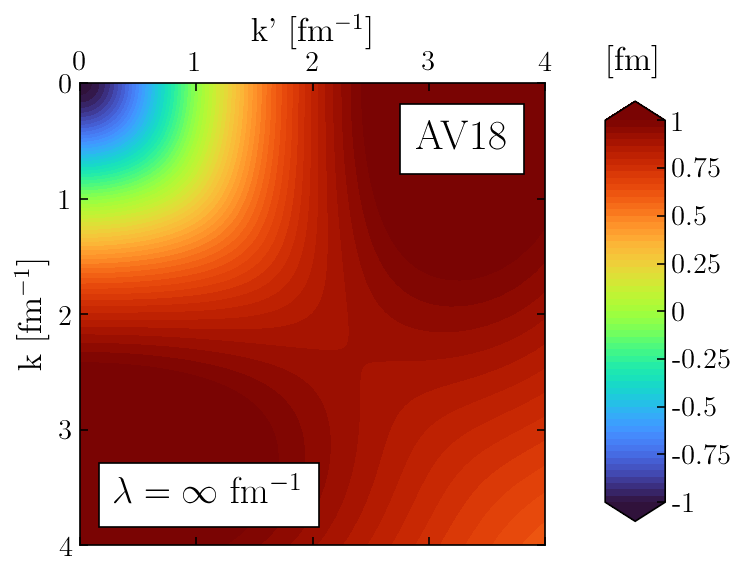

In [9]:
potential_contour(6, '1S0', 15.0, 3.0, 120, kvnn_label=True,
                  lambda_label=True)

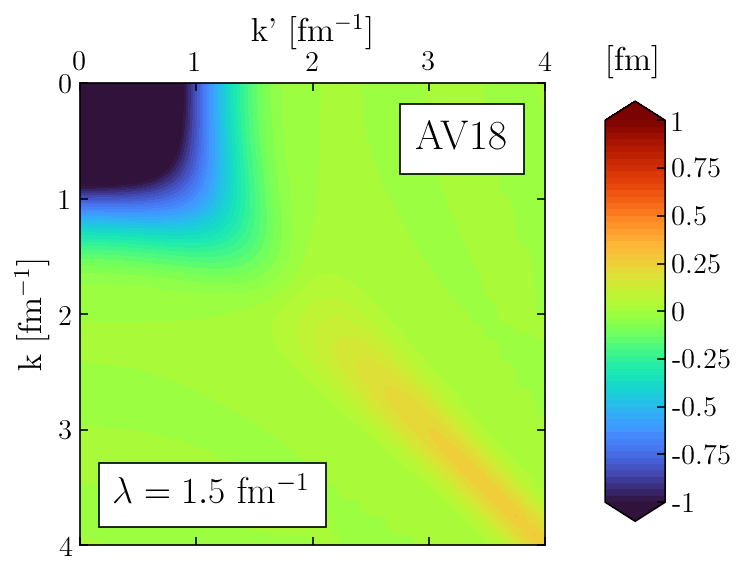

In [22]:
potential_contour(6, '1S0', 15.0, 3.0, 120, 'Wegner', 1.5, kvnn_label=True,
                  lambda_label=True)

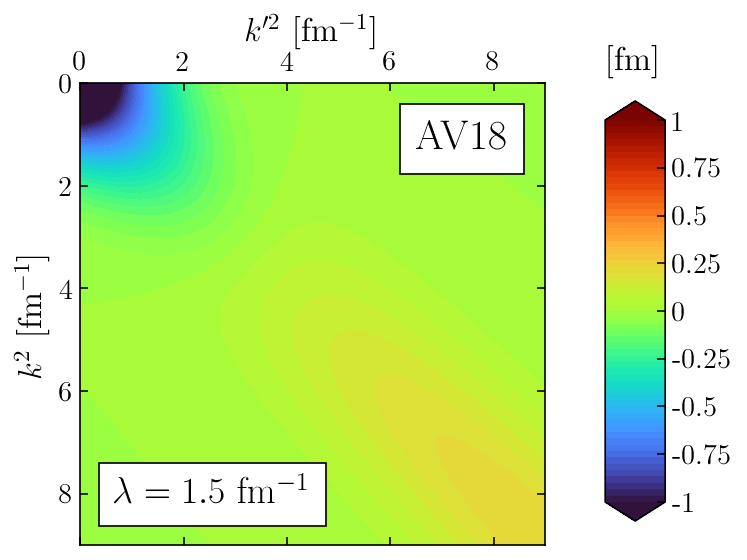

In [23]:
potential_contour(6, '1S0', 15.0, 3.0, 120, 'Wegner', 1.5,
                  axes_limits=(0.0,9.0), k_squared=True, kvnn_label=True,
                  lambda_label=True)

In [12]:
def add_colorbar(
        f, ax_cbar, colorbar_limits, label=None, label_size=18, tick_size=18):
    """Add a colorbar to a contour plot."""
    
    # Tick marks on colorbar
    levels_ticks = np.linspace(colorbar_limits[0], colorbar_limits[1], 9)
    # Make these strings
    levels_ticks_strings = label_ticks(levels_ticks)

    # # Adjust space for colorbar.
    # f.subplots_adjust(right=0.8)
    # cbar_ax = f.add_axes((0.85, 0.15, 0.05, 0.7))
                                         
    # # Set colorbar
    # cbar = f.colorbar(ax_cbar, cax=cbar_ax, ticks=levels_ticks)
    # cbar.ax.tick_params(labelsize=tick_size)
    # cbar.ax.set_yticklabels(levels_ticks_strings)

    # # Add label?
    # if label != None:
    #     cbar.ax.set_title(label, fontsize=label_size, pad=15)
    
    plt.colorbar(ticks=levels_ticks, label=label, labelsize=tick_size, fontsize=label_size)

    return f, ax_cbar

In [13]:
def plot_contours(x_array, z_data, axes_max, colorbar_limits, color_style):

    # Note, this function should not assume anything about the data.

    # Getting the figure size based on the number of keys in the dictionary
    # ...
    # case for single plot
    # case for one row, multiple columns
    # case for multiple rows, multiple columns (might make a function?)
    row_number = 1
    col_number = len(z_data)
    figure_size = (4*col_number*1.25, 4*row_number)  # Extra width for colorbar

    # Initializing the figure with figure size from above.
    plt.close('all')
    f, ax = plt.subplots(row_number, col_number, sharex=True, sharey=True,
                         figsize=figure_size)
    
    # Control the number of contour levels assuming min = -max
    levels_number = 61
    levels = np.linspace(colorbar_limits[0], colorbar_limits[1], levels_number)

    # if multiplot figure
    for i, key in enumerate(z_data):
        
        z_matrix = z_data[key]
        
        # Interpolate from 0 to some finite value less than max of x and y
        x_array_int, z_matrix_int = interpolate_matrix(x_array, z_matrix,
                                                       axes_max+0.2)
        
        ax_cbar = ax[i].contourf(x_array_int, x_array_int, z_matrix_int,
                                 levels, cmap=color_style, extend='both')
        
    #     Add dictionary element to figure

    # else

    #     Add matrix to figure

    # return f, ax, ax_cbar
    return f, ax

In [14]:
def adjust_axes(
        f, ax, axes_limits, x_label, y_label, label_size=16, wspace=0.0,
        hspace=0.0, invert_y=False):
    """Adjust the x- and y-axes of the figure."""
  
    # Get the shape of the figure from ax
    # ...
    # case for single plot
    # case for one row, multiple columns
    # case for multiple rows, multiple columns
    
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=hspace, wspace=wspace)

    # Loop over rows/cols.
    for i in range(len(ax)):
        
        # Set axes limits
        ax[i].set_xlim(axes_limits)
        ax[i].set_ylim(axes_limits)
        
        # Switch from x-axis from bottom to top
        ax[i].xaxis.set_label_position('top')
        ax[i].tick_params(labeltop=True, labelbottom=False)

        # Label axes
        ax[i].set_xlabel(x_label, fontsize=label_size)
        if i == 0:  # Far left column
            ax[i].set_ylabel(y_label, fontsize=label_size)

        # Prevent overlapping x-axis tick marks?
        if wspace == 0.0 and i < len(ax) - 1:
            xticks = ax[i].xaxis.get_major_ticks()
            xticks[-1].set_visible(False)
            
    
    # Invert y-axis?
    if invert_y:
        plt.gca().invert_yaxis()

    return f, ax

## Contours of $V(k,k')$

In [15]:
def potential_contours(
        kvnn, channel, kmax, kmid, ntot, generator, lambda_array,
        axes_limits=(0.0,4.0), colorbar_limits=(-1.0,1.0),
        lambda_labels=False, kvnn_label=False, generator_label=False,
        save=False):
    """
    """

    # Initialize Potential class and get momentum values
    potential = Potential(kvnn, channel, kmax, kmid, ntot)
    k_array, _ = potential.load_mesh()
    
    # Store each potential in a dictionary with \lambda as the key
    d = {}
    for lamb in lambda_array:
        # Case for initial potential
        if lamb == np.inf:
            d[lamb] = potential.load_potential('initial')
        else:
            # Case for block-diagonal (assumes \lambda=1, \Lambda_BD=lamb)
            if generator == 'Block-diag':
                d[lamb] = potential.load_potential('srg', generator, 1.0,
                                                   lambda_bd=lamb)
            # Case for band-diagonal generators
            else:
                d[lamb] = potential.load_potential('srg', generator, lamb)
                
    # Set contour color style
    color_style = 'turbo'
    
    # Set limit on interpolation with axes_max
    axes_max = axes_limits[1]
                
    # Add potentials to figure
    f, ax, ax_cbar = fg.plot_contours(k_array, d, axes_max, colorbar_limits,
                                      color_style)

    # Set x- and y-axes
    x_label = "k' [fm" + r'$^{-1}$' + ']'
    y_label = 'k [fm' + r'$^{-1}$' + ']'
    axes_label_size = 16
    f, ax = fg.adjust_axes(f, ax, axes_limits, x_label, y_label,
                           label_size=axes_label_size, invert_y=True)

    # Set colorbar
    colorbar_label = '[fm]'
    colorbar_label_size = 16
    colorbar_tick_size = 14
    f, ax_cbar = fg.add_colorbar(
        f, ax_cbar, colorbar_limits, label=colorbar_label,
        label_size=colorbar_label_size, tick_size=colorbar_tick_size)
    
    # Add \lambda label to each sub-plot?
    if lambda_labels:
        lambda_label_size = 18
        lambda_label_location = 'lower left'
        for i, ilamb in enumerate(lambda_array):
            lambda_label = lb.label_lambda(ilamb, generator)
            anchored_text = AnchoredText(
                lambda_label, loc=lambda_label_location,
                prop=dict(size=lambda_label_size))
            ax[i].add_artist(anchored_text)

    # Add potential label to first sub-plot?
    if kvnn_label:
        kvnn_label = lb.label_kvnn(kvnn)
        kvnn_label_size = 20
        kvnn_label_location = 'upper right'
        anchored_text = AnchoredText(kvnn_label, loc=kvnn_label_location,
                                     prop=dict(size=kvnn_label_size))
        ax[0].add_artist(anchored_text)
        
    # Add generator label to last sub-plot?
    if generator_label:
        generator_label = lb.label_generator(generator)
        generator_label_size = 20
        generator_label_location = 'upper right'
        anchored_text = AnchoredText(
            generator_label, loc=generator_label_location,
            prop=dict(size=generator_label_size))
        ax[-1].add_artist(anchored_text)

    # Save figure?
    if save:
        file_name = (f'potential_contours_kvnn_{kvnn:d}_{channel}'
                     f'_{generator}_lambdas')
        for ilamb in lambda_array:
            if ilamb == np.inf:
                lamb_str = 'inf'
            else:
                lamb_str = convert_number_to_string(ilamb)
            file_name += f'_{lamb_str}'
        file_name = lb.replace_periods(file_name) + '.png'
        f.savefig(figures_directory + file_name)
        
    # TESTING
    print(f'Shape = {ax.shape}')
    print(f'Dimensions = {ax.ndim}')
    print(f'Length = {len(ax)}')
    print(f'Size = {ax.size}')

In [16]:
# # Test RKE N4LO 450 MeV in 1P1 channel
# kvnn = 111
# channel = '1P1'
# kmax, kmid, ntot = 10.0, 2.0, 120
# lambda_array = np.array([np.inf, 3.0, 2.0, 1.5])
# clim = (-0.4, 0.4)

In [17]:
# # Band-diagonal generator
# potential_contours(
#     kvnn, channel, kmax, kmid, ntot, 'Wegner', lambda_array,
#     colorbar_limits=clim, lambda_labels=True, generator_label=True,
#     save=False)

In [18]:
# # Block-diagonal generator
# potential_contours(
#     kvnn, channel, kmax, kmid, ntot, 'Block-diag', lambda_array,
#     colorbar_limits=clim, lambda_labels=True, generator_label=True,
#     save=False)